In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from scipy.stats import chi2_contingency

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv(r"visadata.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [5]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

# EDA

In [26]:
num_cols = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_cols = [feature for feature in df.columns if df[feature].dtype == 'O']


print('We have {} numeric columns :{} '.format(len(num_cols),num_cols))
print('We have {} categorical columns :{} '.format(len(cat_cols),cat_cols))

We have 3 numeric columns :['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 
We have 9 categorical columns :['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status'] 


In [8]:
# Proportions of count data in categorical column.

for x in cat_cols:
    print(df[x].value_counts(normalize=True)*100)
    print('---------------------')

case_id
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
EZYV05       0.003925
               ...   
EZYV25476    0.003925
EZYV25477    0.003925
EZYV25478    0.003925
EZYV25479    0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------
region_of_employment
Northeast    28.237834
South        27.53924

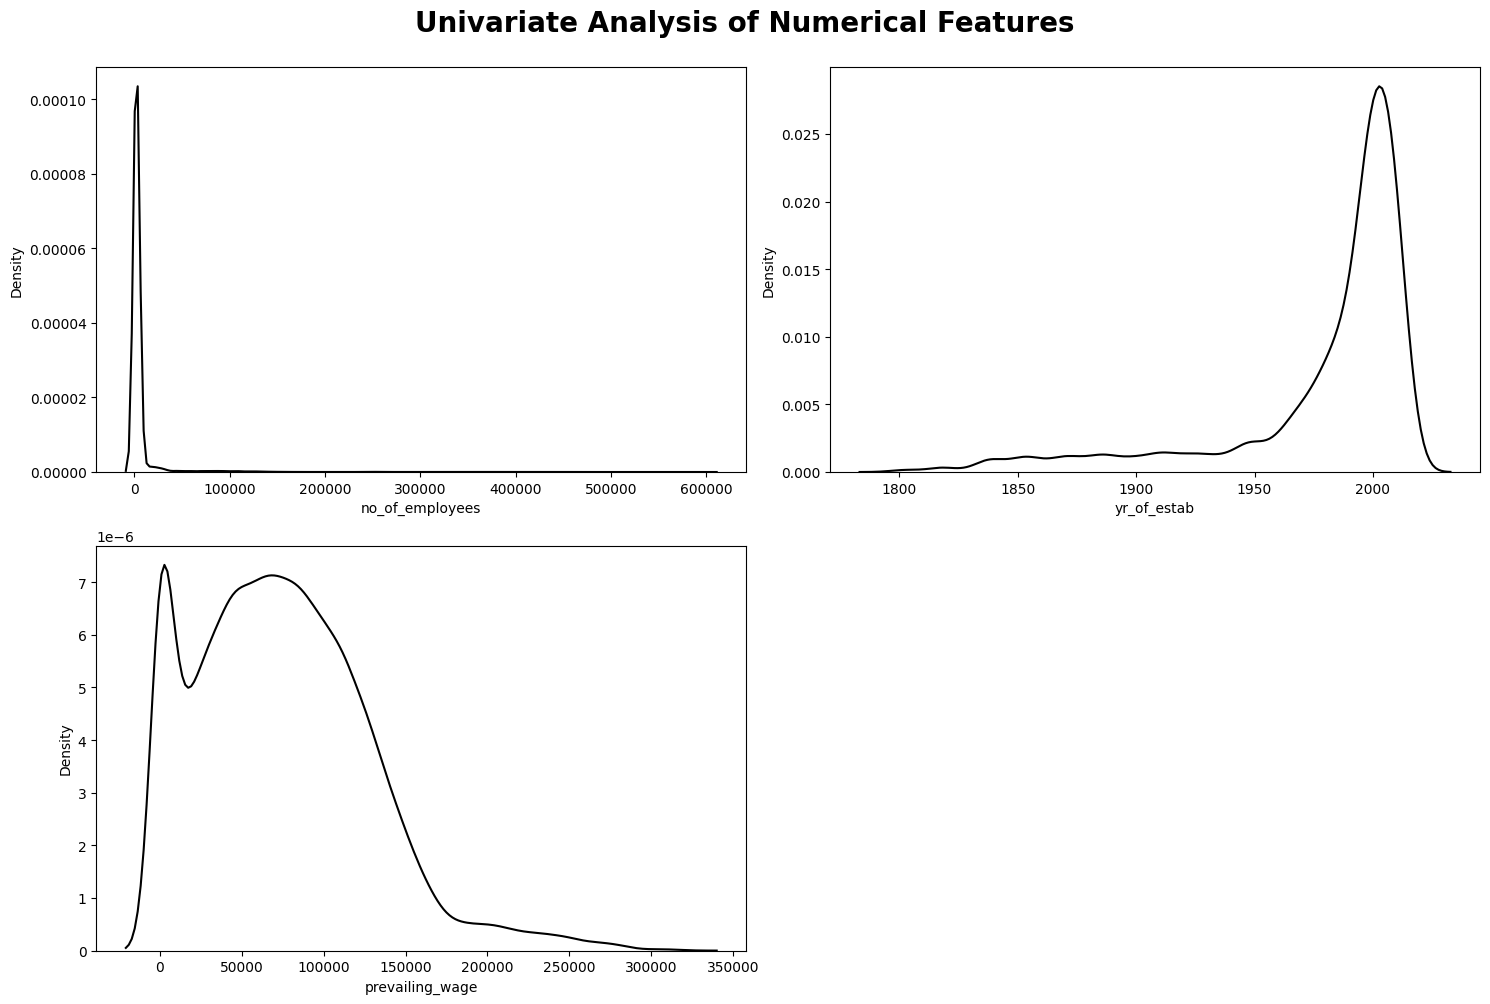

In [20]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20,fontweight='bold',alpha=1,y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(2,2, i+1)
    sns.kdeplot(x=df[num_cols[i]],color='black')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

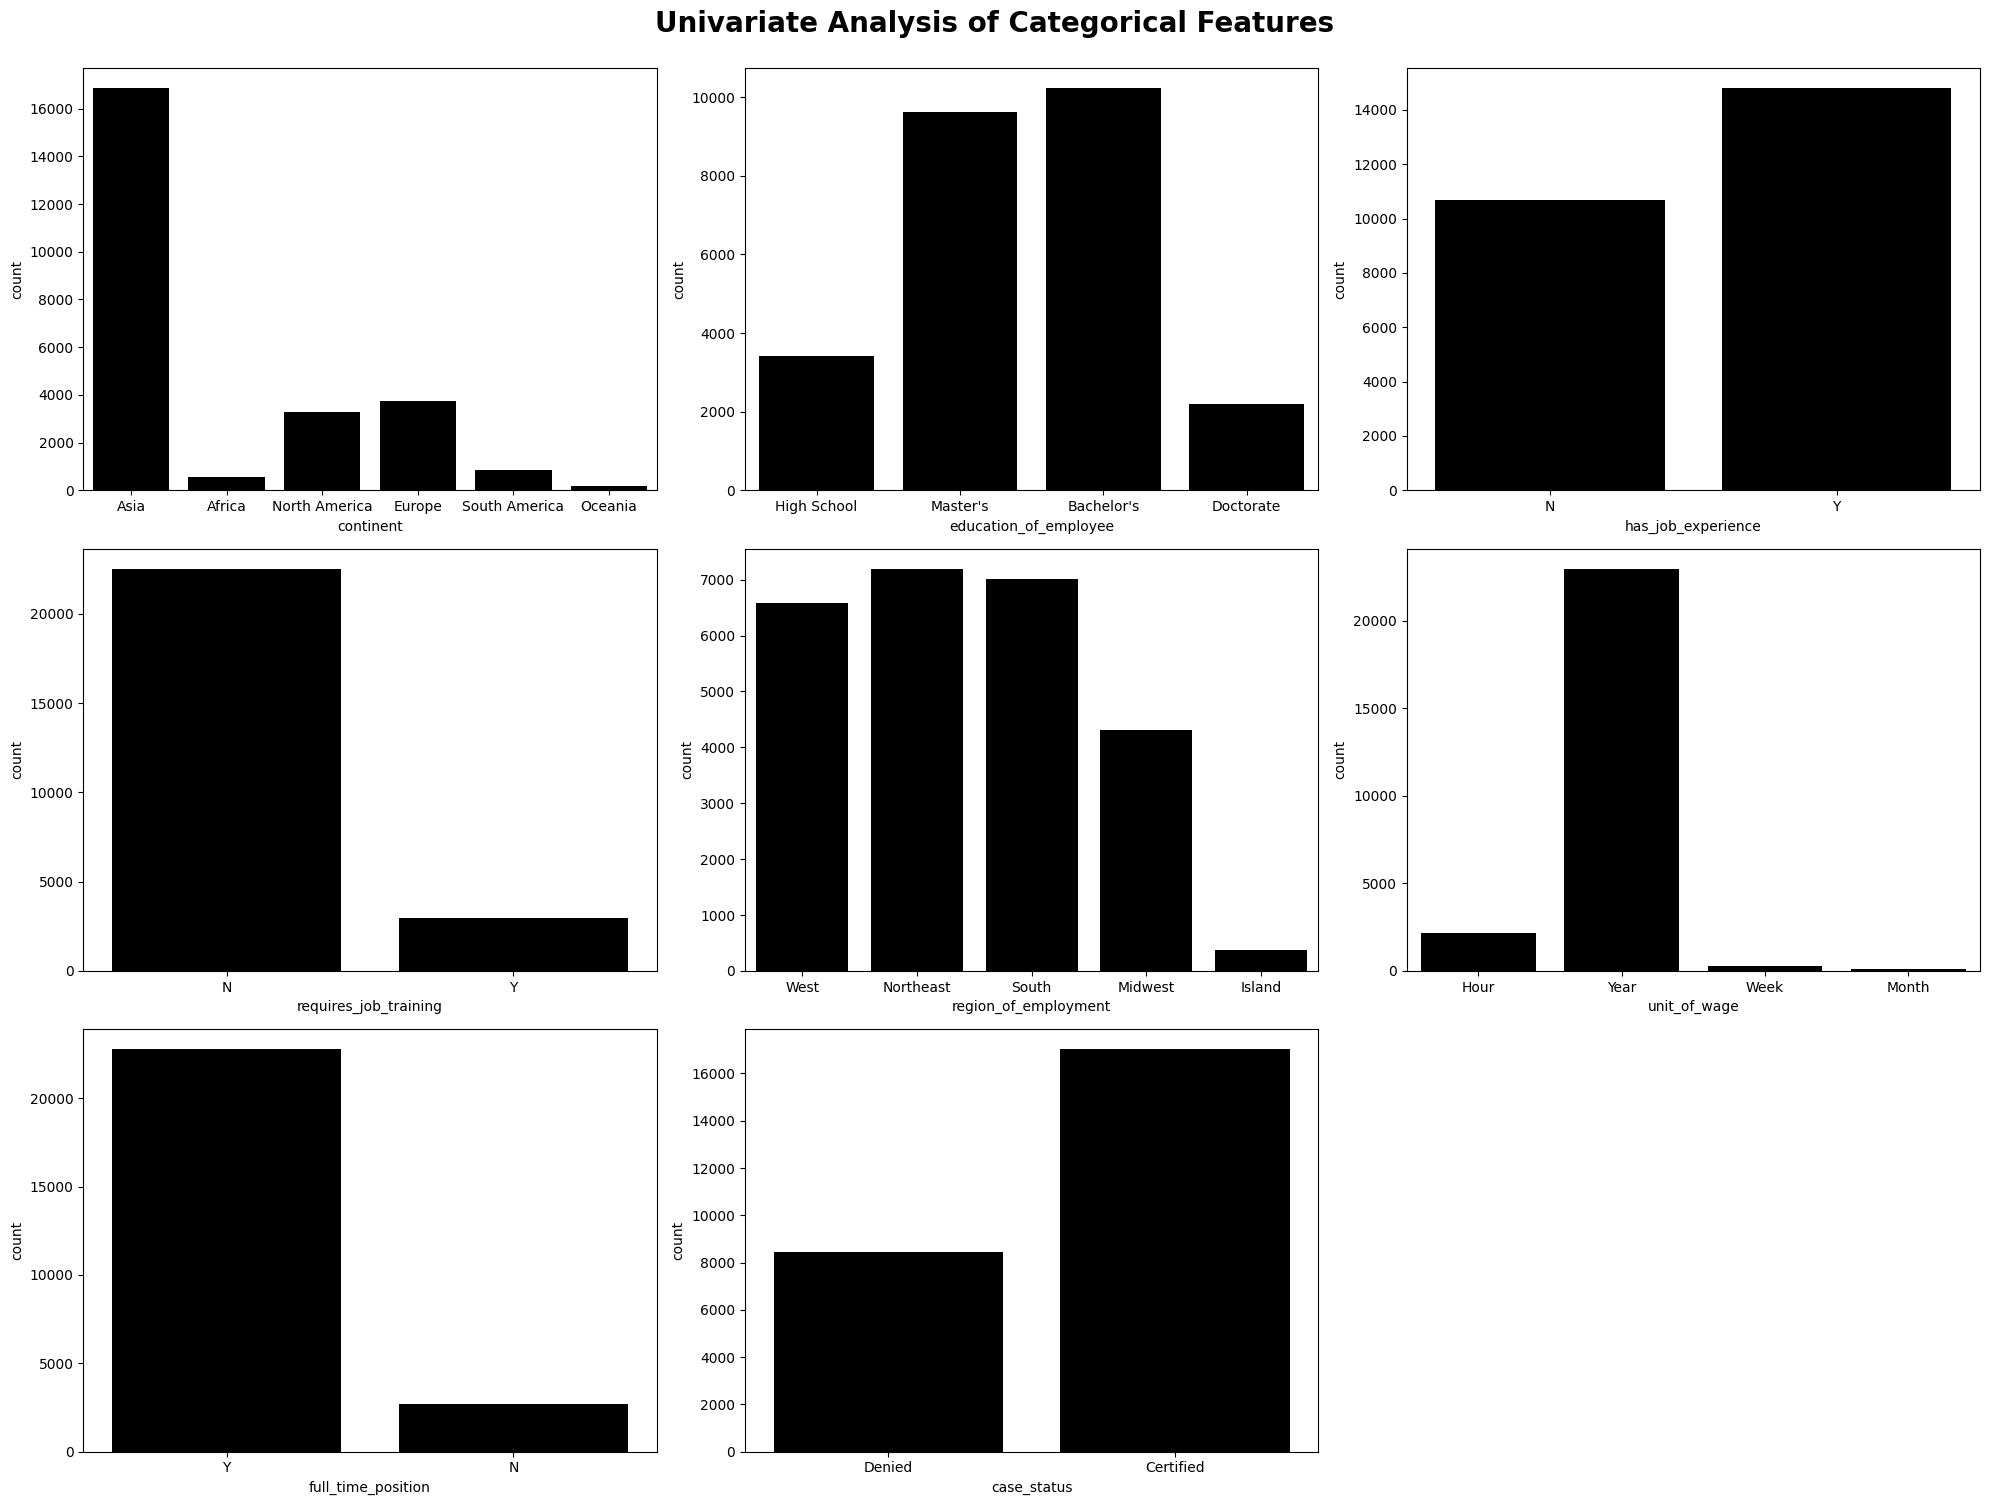

In [27]:
cat_cols.remove('case_id')
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20,fontweight='bold',alpha=1,y=1.)

for i in range(0, len(cat_cols)):
    plt.subplot(3,3, i+1)
    sns.countplot(x=df[cat_cols[i]],color='black')
    plt.xlabel(cat_cols[i])
    plt.tight_layout()

In [33]:
chi_test=[]

for feature in cat_cols:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05: # type: ignore
        chi_test.append('Reject Null Hypothesis')

    else:
        chi_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi_test]).T
result.columns = ['Columns','hypothesis Test Result']
result

,Columns,hypothesis Test Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


##### In the above test we can deduce that the target variable 'case_status' is related to all the feature columns except the 'requires_job_training' which fails to Reject Null Hypothesis, where in the hypothesis testing the p-value is taken to '0.05'. 
##### Here 'pd.crosstab' is used to create a contingency table that Shows frequency counts between two categorical variables.

In [35]:
corr = df[num_cols].corr()

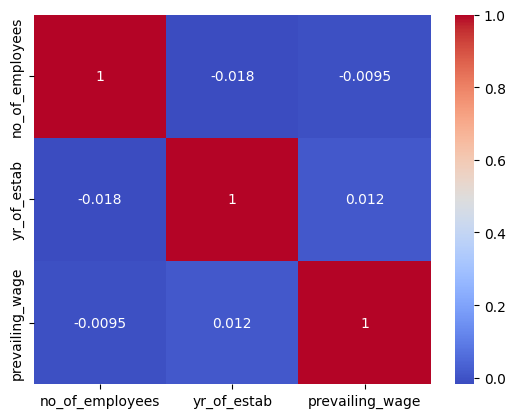

In [36]:
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

In [38]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [37]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

In [39]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

In [ ]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

In [41]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

In [42]:
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

In [43]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

In [44]:
df.groupby('full_time_position')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
full_time_position case_status            
N                  Certified     68.526044
                   Denied        31.473956
Y                  Certified     66.583235
                   Denied        33.416765

In [46]:
print('Grouping WAge of the employees based on their education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Grouping WAge of the employees based on their education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


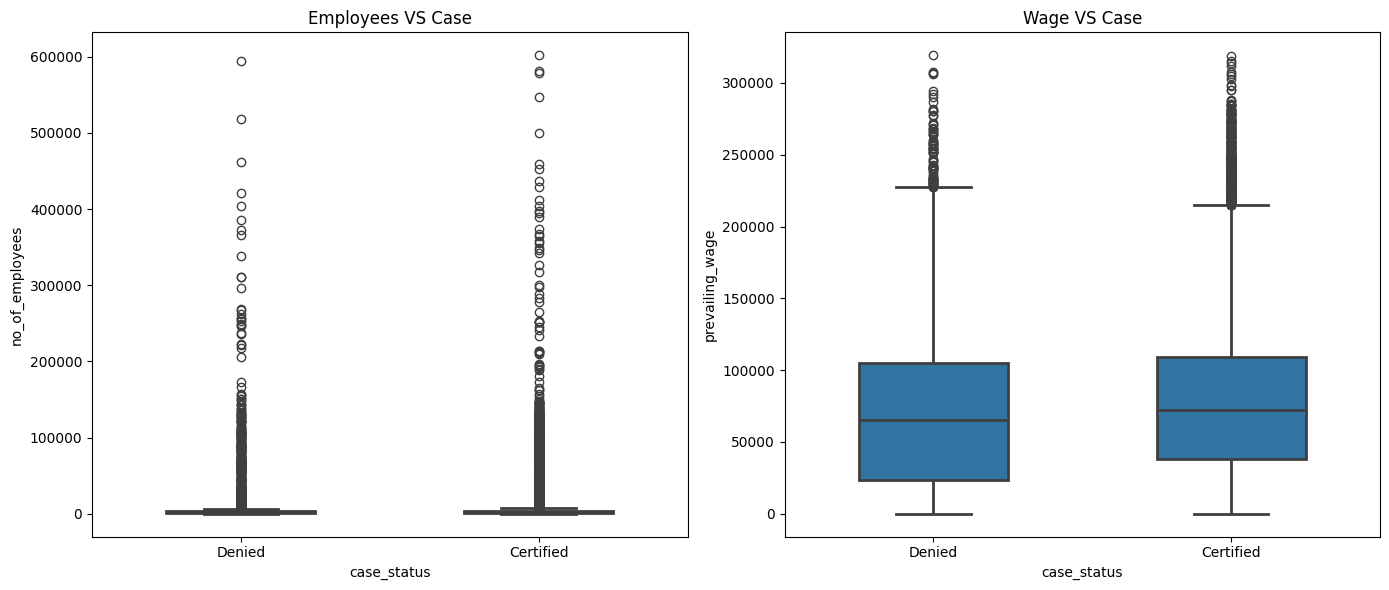

In [ ]:
# Checking for Outliers in the Numeric Columns.
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='case_status',y='no_of_employees',data=df,width=0.5,
    showfliers=True,
    whis=1.5,
    linewidth=2)
plt.title('Employees VS Case')

plt.subplot(1,2,2)
sns.boxplot(x='case_status',y='prevailing_wage',data=df,width=0.5,
    showfliers=True,
    whis=1.5,
    linewidth=2)
plt.title('Wage VS Case')

plt.tight_layout()


In [51]:
df['continent'].value_counts(normalize=True)*100

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64